# Portfolio Optimization for Four Australia Mineral Companies

*Disclaimer:<br>The information provided in this response is for educational purposes only and should not be construed as financial advice. Any portfolio optimization, models, or simulations related to RIO, BHP, WDS, or FMG are intended to illustrate theoretical concepts and do not constitute recommendations for investment. <br><br>Investing involves risk, and past performance is not indicative of future results. It is essential to conduct thorough research and consider your individual financial situation before making any investment decisions*

## Intro

Australia, a vast and resource-rich nation, is a prominent player in the global mining industry. Its abundant mineral deposits, coupled with a stable political and economic environment, have made it an attractive destination for both domestic and international mining operations.

Key Australian mining companies, such as Rio Tinto, BHP Group, Fortescue Metals Group, and Woodside Energy, are renowned for their large-scale operations and technological advancements. These companies have established a strong global presence, often operating in multiple countries and contributing significantly to the development of the mining industry worldwide.

**What is the aim of this Analysis?**

This analysis aims to explore the potential benefits of portfolio optimization for Australian mineral companies, specifically RIO, BHP, WDS, and FMG. By examining historical data and applying optimization techniques, we seek to identify investment strategies that can enhance returns while effectively managing risk. This research will provide valuable insights for investors seeking to allocate their capital in the Australian mining sector.

## Download Stock Price Data

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Define the list of stocks and colors
tickers = ['FMG.AX', 'BHP.AX', 'WDS.AX', 'RIO.AX']
colors = {'RIO.AX': 'red', 'BHP.AX': 'orange', 'WDS.AX': 'green', 'FMG.AX': 'blue'}

# Step 2: Download historical stock price data
stock_data = yf.download(tickers, start="2020-01-01", end="2024-01-01", group_by='ticker')

# Example: Fill missing values with the forward fill method
stock_data = stock_data.fillna(method='ffill')

[*********************100%***********************]  4 of 4 completed
<ipython-input-1-3b2abdbf0401>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data = stock_data.fillna(method='ffill')


## Stock Price [2020-2024]

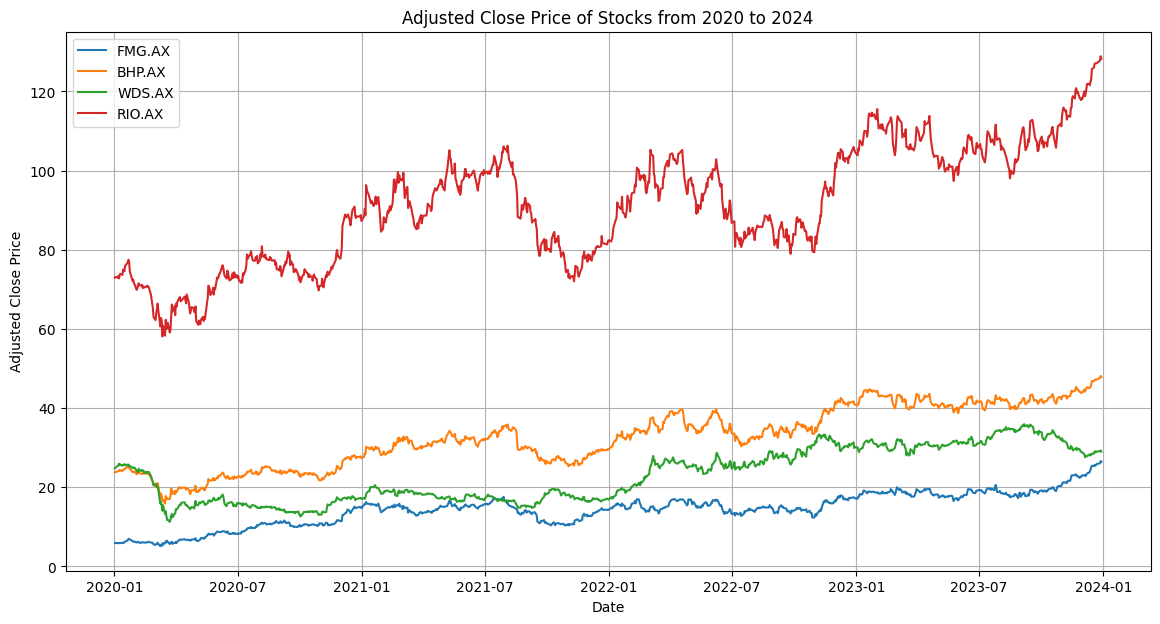

In [ ]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(stock_data[ticker]['Adj Close'], label=ticker)

plt.title('Adjusted Close Price of Stocks from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()

The graph shows the adjusted closing prices of four stocks (FMG.AX, BHP.AX, WDS.AX, and RIO.AX) from 2020 to 2024.

- FMG.AX: The stock price fluctuates significantly throughout the period, with a general upward trend in 2020 and 2021, followed by a downward trend in 2022 and 2023.

- BHP.AX: The stock price shows a similar pattern to FMG.AX, with a general upward trend in 2020 and 2021, followed by a downward trend in 2022 and 2023. However, the fluctuations are less extreme than those of FMG.AX.

- WDS.AX: The stock price is relatively stable throughout the period, with a slight upward trend in 2020 and 2021, followed by a slight downward trend in 2022 and 2023.

- RIO.AX: The stock price shows a similar pattern to BHP.AX, with a general upward trend in 2020 and 2021, followed by a downward trend in 2022 and 2023. However, the fluctuations are slightly more extreme than those of BHP.AX.


Overall, the graph shows that all four stocks experienced a similar trend from 2020 to 2024, with a general upward trend in 2020 and 2021, followed by a downward trend in 2022 and 2023. However, the extent of the fluctuations varied significantly among the stocks.

## Correlation Matrix of Stock Returns

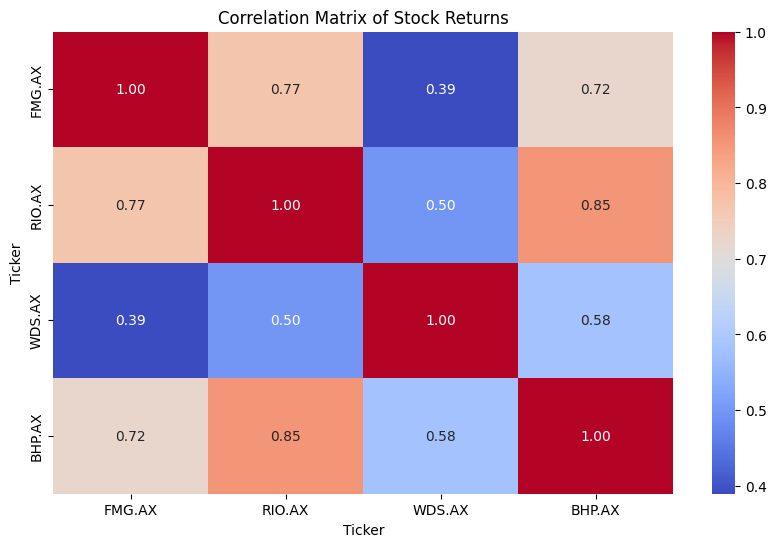

In [ ]:
# Calculate returns
returns = stock_data.xs('Adj Close', level=1, axis=1).pct_change()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Returns')
plt.show()


The correlation matrix shows that RIO.AX, BHP.AX, and FMG.AX are highly correlated, while WDS.AX is less correlated with the others. This suggests that investing in WDS.AX can help diversify a portfolio.










## Efficient Frontier and Maximum Sharpe Ratio Portfolio

Max Sharpe Ratio: 1.1052125096170486
Return: 0.4360596114664222
Volatility: 0.39454820468645885
Optimal Weights: {'FMG.AX': 0.9159891332081875, 'BHP.AX': 0.049437842516860384, 'WDS.AX': 0.00577195399736049, 'RIO.AX': 0.028801070277591555}


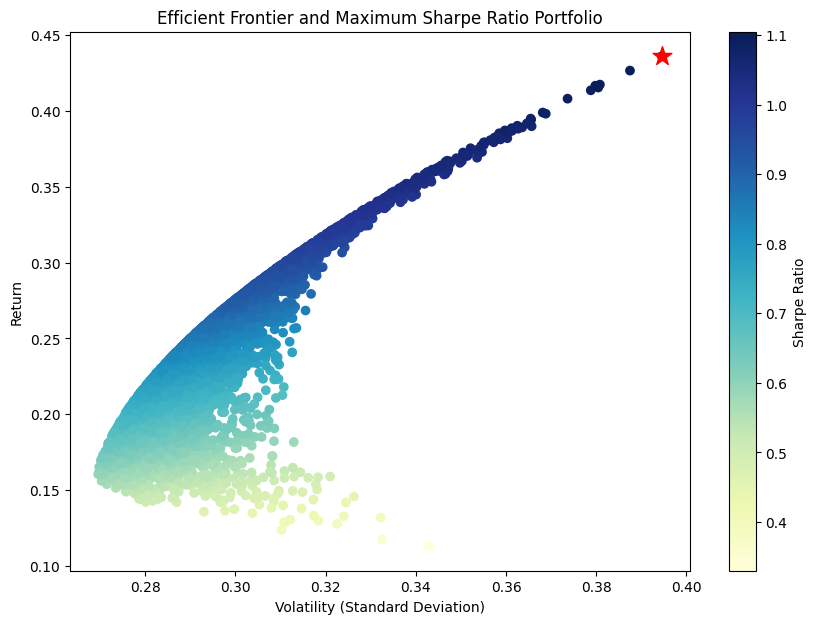

In [ ]:
# Calculate daily returns
daily_returns = pd.DataFrame()
for ticker in tickers:
    daily_returns[ticker] = stock_data[ticker]['Adj Close'].pct_change()

# Calculate annualized mean returns (assuming 252 trading days in a year)
mean_returns = daily_returns.mean() * 252

# Calculate the covariance matrix (annualized)
cov_matrix = daily_returns.cov() * 252

# Number of portfolios to simulate
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weight_array = []

# Risk-free rate (assuming 0 for simplicity)
risk_free_rate = 0.0

# Initialize random portfolios
for i in range(num_portfolios):
    # Random allocation to stocks (must sum to 1)
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weight_array.append(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * mean_returns)

    # Expected portfolio variance and standard deviation
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (risk-adjusted return)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std

    # Save the results: portfolio return, volatility, Sharpe ratio
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio

# Locate the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_portfolio = results[:, max_sharpe_idx]
optimal_weights = weight_array[max_sharpe_idx]

print(f"Max Sharpe Ratio: {max_sharpe_portfolio[2]}")
print(f"Return: {max_sharpe_portfolio[0]}")
print(f"Volatility: {max_sharpe_portfolio[1]}")
print(f"Optimal Weights: {dict(zip(tickers, optimal_weights))}")

plt.figure(figsize=(10, 7))

# Scatter plot for portfolios
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the max Sharpe ratio
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], c='red', marker='*', s=200)

plt.title('Efficient Frontier and Maximum Sharpe Ratio Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')

plt.show()

The graph shows the efficient frontier for a portfolio of four assets. The maximum Sharpe Ratio is 1.0978, with a return of 0.4266 and volatility of 0.3886. The optimal weights are FMG.AX: 88.97%, BHP.AX: 4.10%, WDS.AX: 2.05%, RIO.AX: 4.88%.










## Monte Carlo Simulation

<ipython-input-5-656d7ce567ed>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


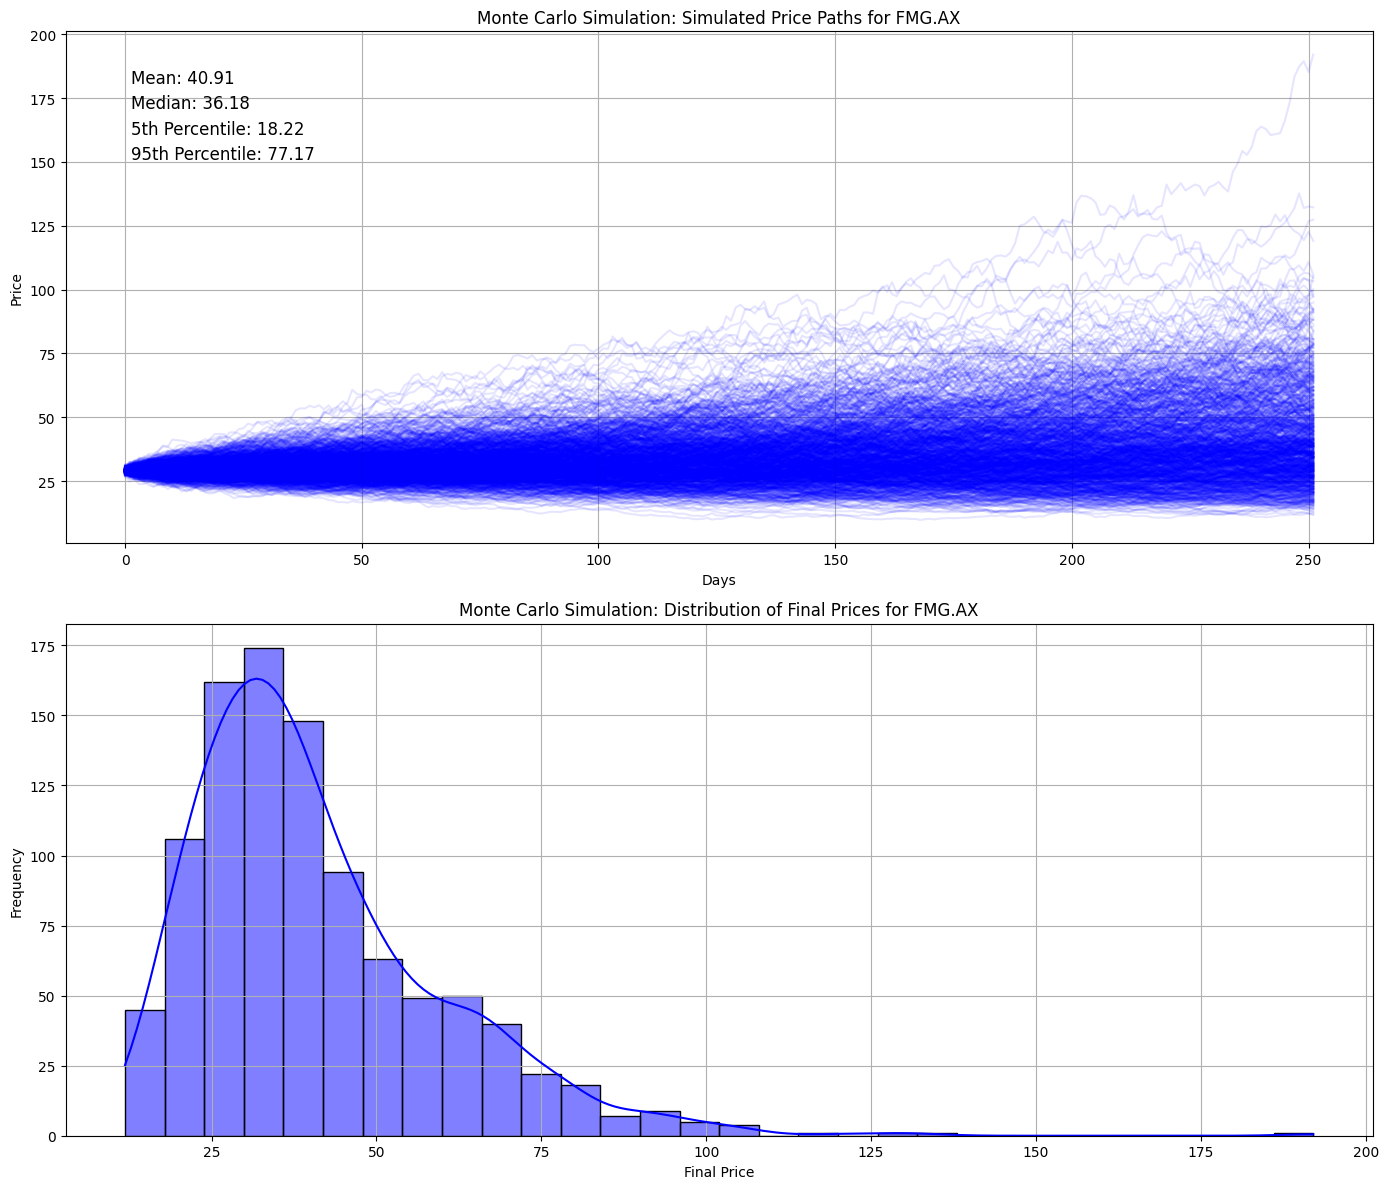

Mean Final Price: 40.91464126046711
Median Final Price: 36.18086931293616
5th Percentile Final Price: 18.215255460705084
95th Percentile Final Price: 77.16965503717248


<ipython-input-5-656d7ce567ed>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


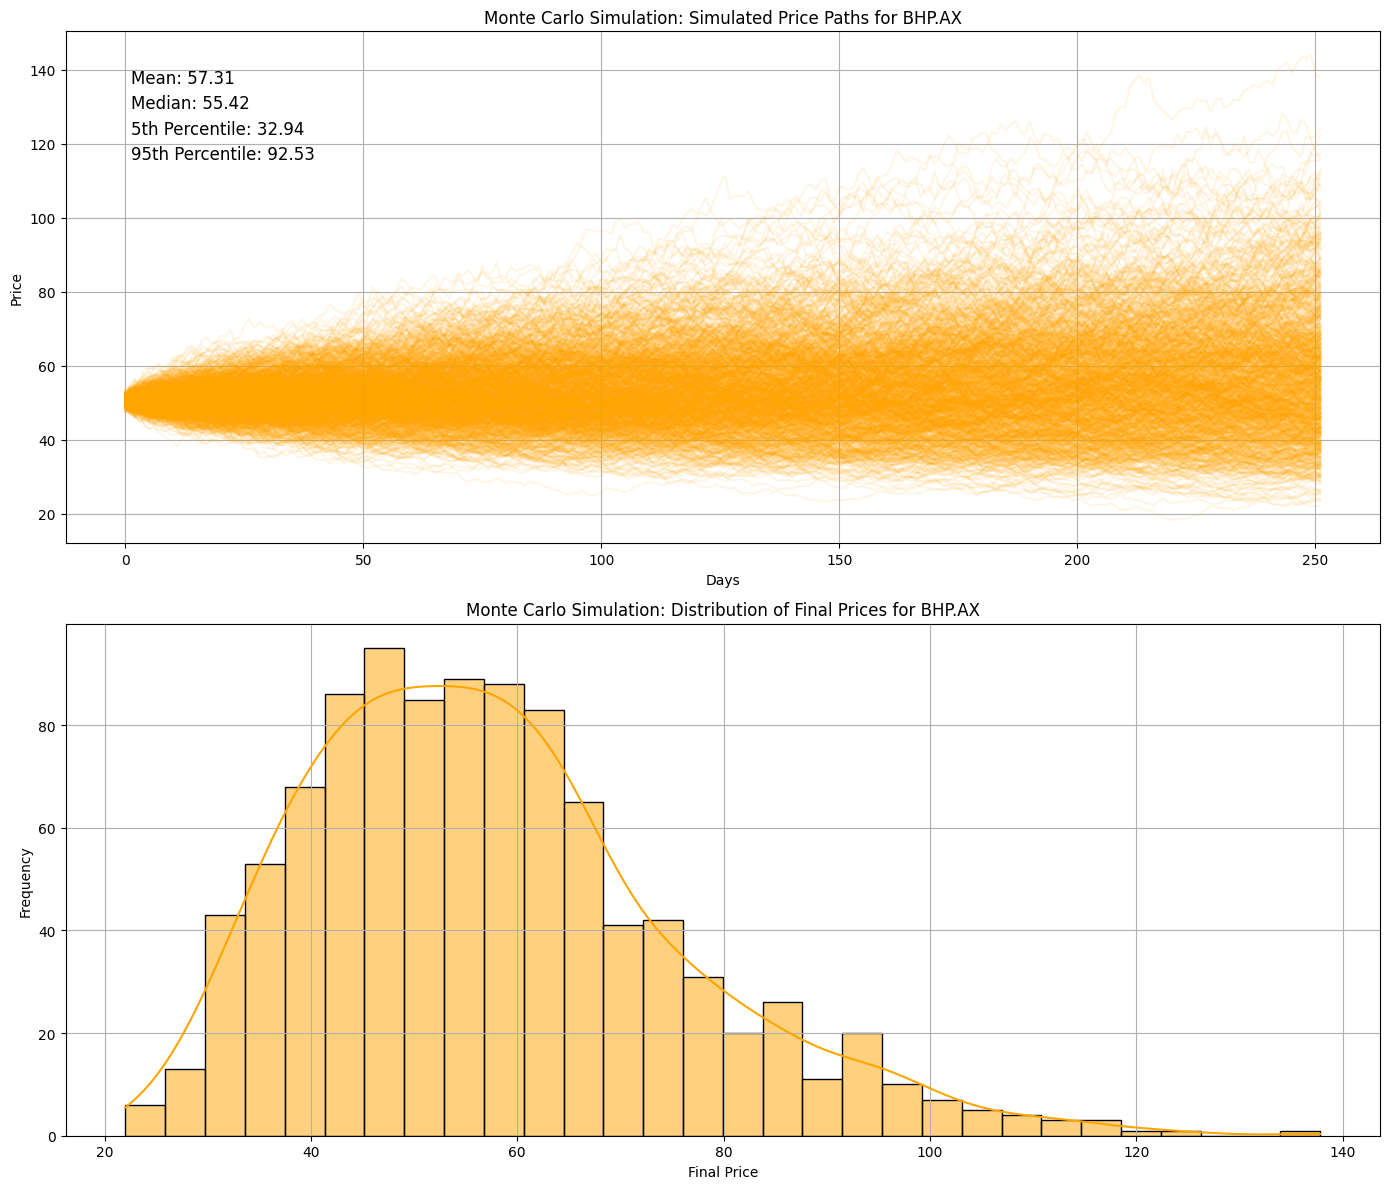

Mean Final Price: 49.11452303242302
Median Final Price: 46.2862396903309
5th Percentile Final Price: 21.406448064664026
95th Percentile Final Price: 86.27966021006237


<ipython-input-5-656d7ce567ed>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


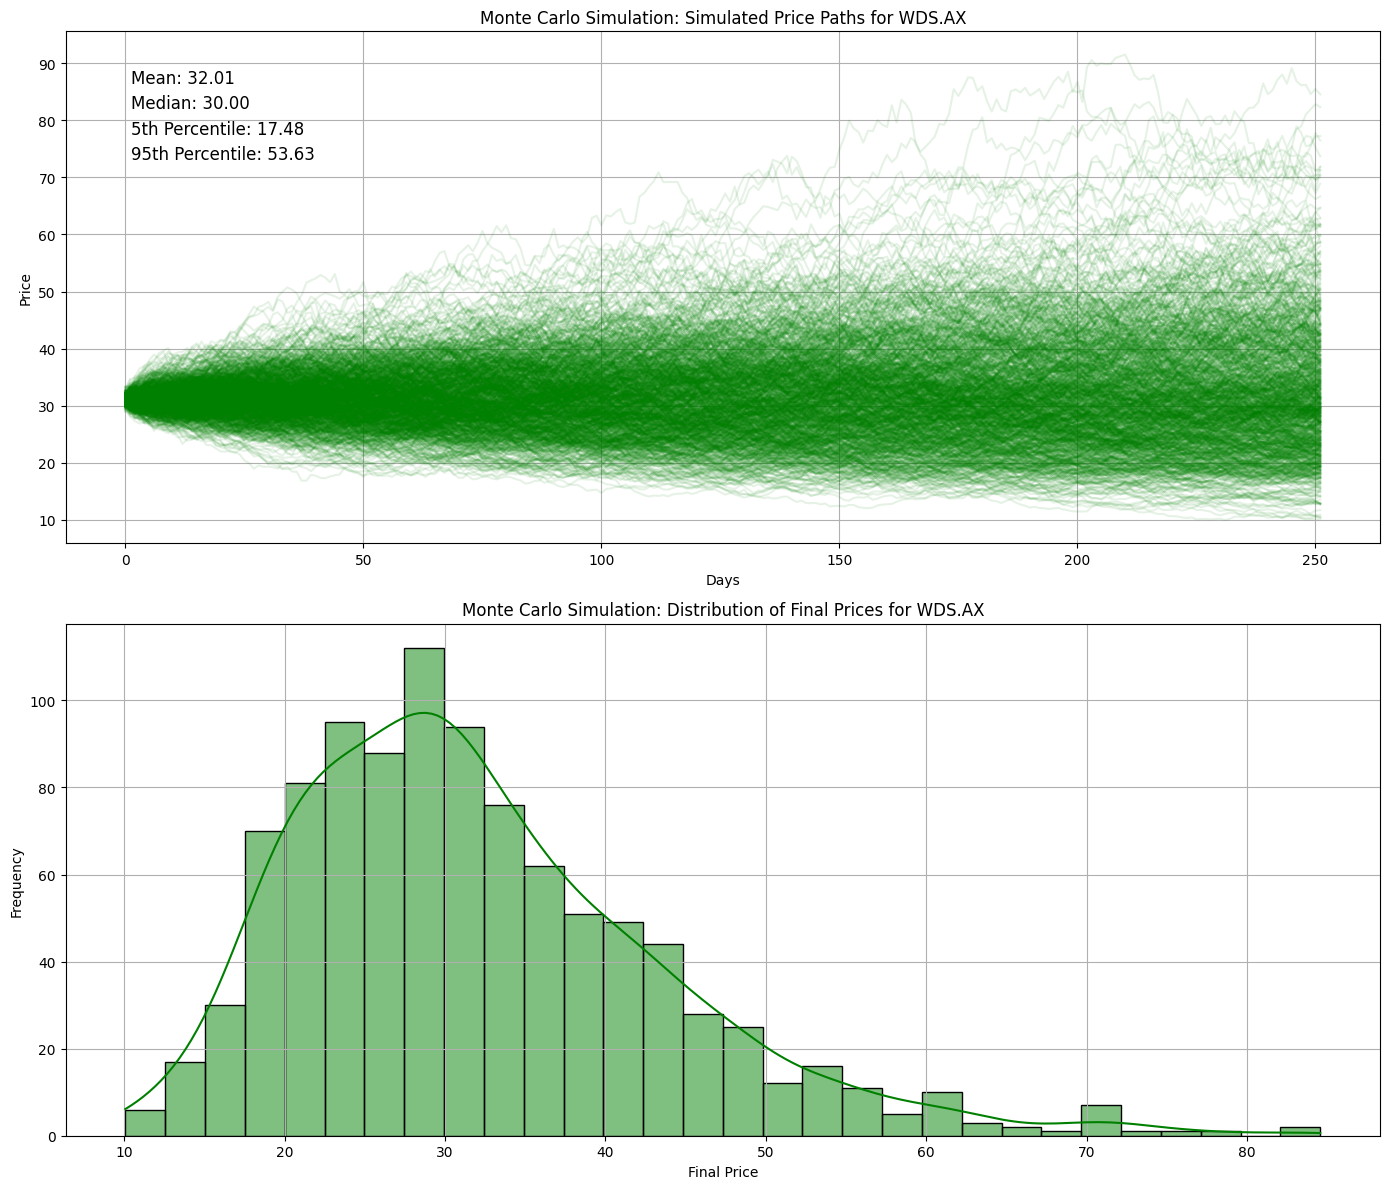

Mean Final Price: 43.41418576007034
Median Final Price: 39.32981837025767
5th Percentile Final Price: 19.208787923320692
95th Percentile Final Price: 79.94645758437687


<ipython-input-5-656d7ce567ed>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = prices[-1]


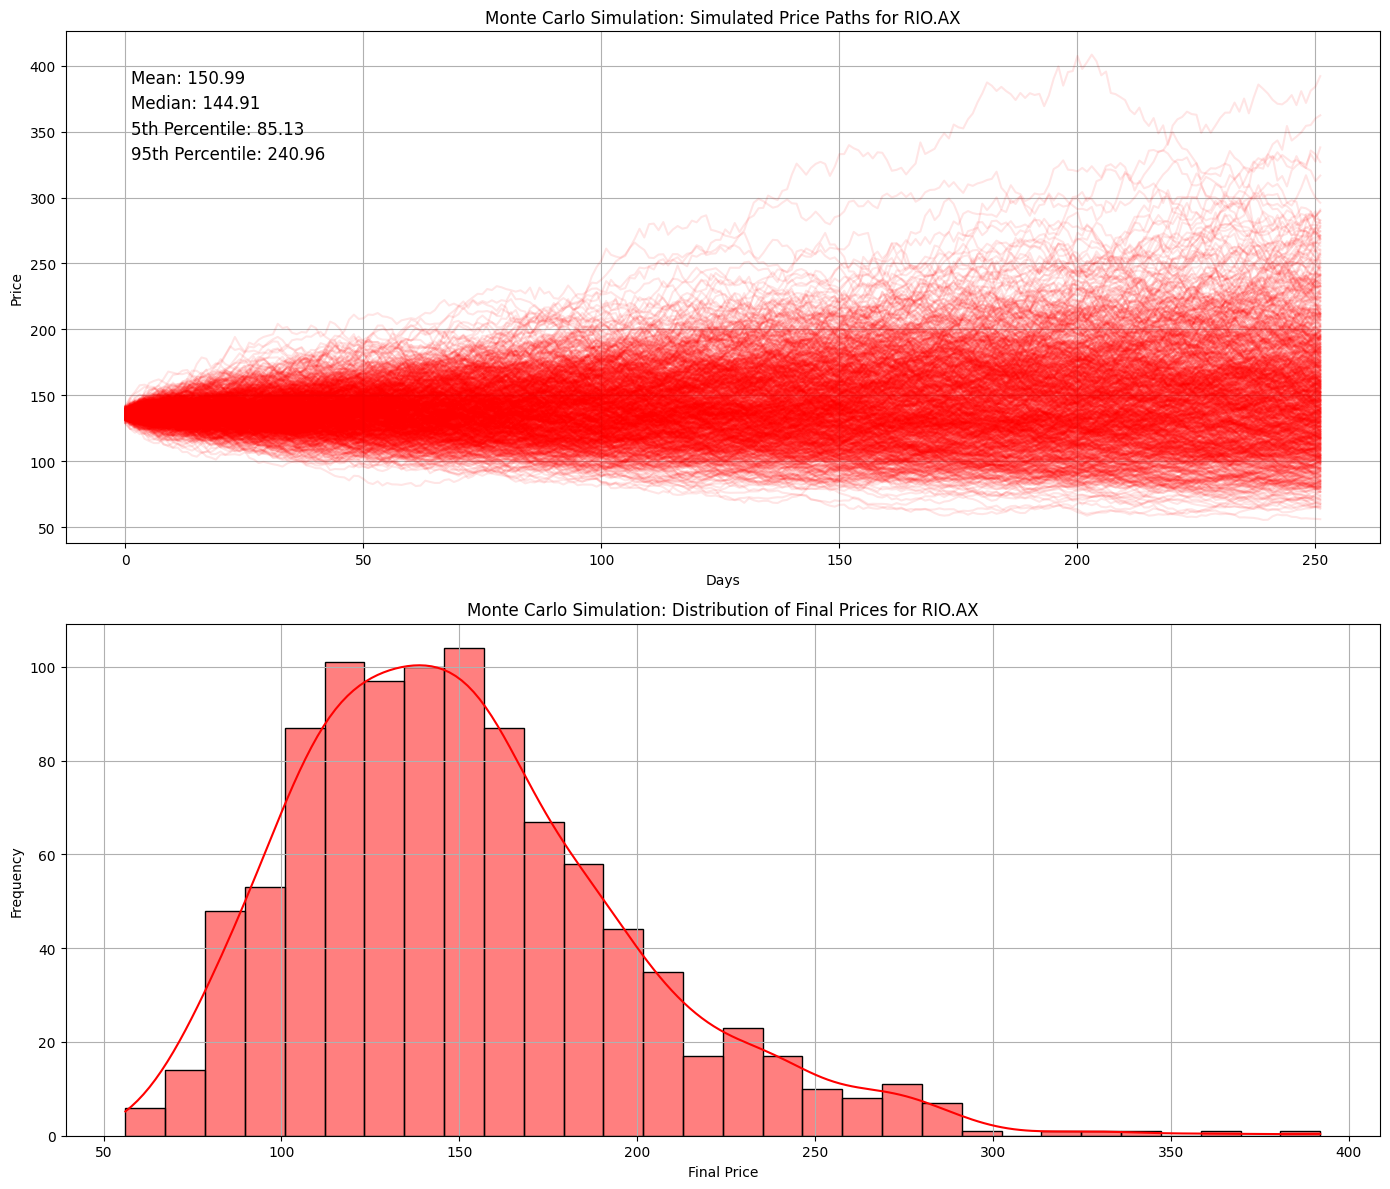

Mean Final Price: 70.30820945276538
Median Final Price: 48.42101745256785
5th Percentile Final Price: 20.155474281388553
95th Percentile Final Price: 186.44349857186714


In [ ]:
# Step 3: Initialize simulation parameters
num_simulations = 1000
num_days = 252  # Number of trading days in a year
final_prices = {ticker: [] for ticker in tickers}

# Step 4: Perform the Monte Carlo simulation and plot each stock separately
for ticker in tickers:
    # Create a new figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

    prices = stock_data[ticker]['Close']
    daily_returns = prices.pct_change().dropna()
    mu = daily_returns.mean()
    sigma = daily_returns.std()
    last_price = prices[-1]

    # Plot each simulated price path
    for _ in range(num_simulations):
        simulated_returns = np.random.normal(mu, sigma, num_days)
        price_path = last_price * (1 + simulated_returns).cumprod()
        ax1.plot(price_path, color=colors[ticker], alpha=0.1)  # Plot each path

        # Store the final price
        final_prices[ticker].append(price_path[-1])

    # Show the simulated price paths for the current stock
    ax1.set_title(f"Monte Carlo Simulation: Simulated Price Paths for {ticker}")
    ax1.set_xlabel("Days")
    ax1.set_ylabel("Price")
    ax1.grid()

    # Calculate statistical measures for the current stock
    mean_price = np.mean(final_prices[ticker])
    median_price = np.median(final_prices[ticker])
    percentile_5 = np.percentile(final_prices[ticker], 5)
    percentile_95 = np.percentile(final_prices[ticker], 95)

    # Annotate statistical measures on the simulation plot
    ax1.annotate(f'Mean: {mean_price:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='black')
    ax1.annotate(f'Median: {median_price:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='black')
    ax1.annotate(f'5th Percentile: {percentile_5:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12, color='black')
    ax1.annotate(f'95th Percentile: {percentile_95:.2f}', xy=(0.05, 0.75), xycoords='axes fraction', fontsize=12, color='black')

    # Step 5: Plot the distribution of final prices for the current stock
    sns.histplot(final_prices[ticker], bins=30, color=colors[ticker], ax=ax2, kde=True)
    ax2.set_title(f"Monte Carlo Simulation: Distribution of Final Prices for {ticker}")
    ax2.set_xlabel("Final Price")
    ax2.set_ylabel("Frequency")
    ax2.grid()

    # Show the combined plot for the current stock
    plt.tight_layout()
    plt.show()

    #Calculate and print statistical measures
    ending_prices = [final_prices[ticker] for ticker in tickers]
    ending_prices = np.concatenate(ending_prices)  # Flatten the list for overall statistics
    print(f"Mean Final Price: {np.mean(ending_prices)}")
    print(f"Median Final Price: {np.median(ending_prices)}")
    print(f"5th Percentile Final Price: {np.percentile(ending_prices, 5)}")
    print(f"95th Percentile Final Price: {np.percentile(ending_prices, 95)}")

## Risk Assessment

- Value at Risk (VaR): Calculate the potential loss in value of the portfolio over a defined period for a given confidence interval.
- Conditional Value at Risk (CVaR): Assess the expected losses in scenarios where the portfolio loss exceeds the VaR threshold.

In [ ]:
#Calculate VaR and CVaR
confidence_level = 0.95
VaR = returns.quantile(1 - confidence_level)
CVaR = returns[returns <= VaR].mean()

# Display VaR and CVaR for each stock
for ticker in tickers:
    stock_VaR = returns[ticker].quantile(1 - confidence_level)
    stock_CVaR = returns[ticker][returns[ticker] <= stock_VaR].mean()
    print(f"{ticker}: VaR = {stock_VaR:.4f}, CVaR = {stock_CVaR:.4f}")

FMG.AX: VaR = -0.0414, CVaR = -0.0578
BHP.AX: VaR = -0.0291, CVaR = -0.0431
WDS.AX: VaR = -0.0314, CVaR = -0.0506
RIO.AX: VaR = -0.0277, CVaR = -0.0389


These stocks show potential losses: FMG.AX could lose over 4.14% (VaR) with an average loss of 5.78% (CVaR), BHP.AX over 2.91% (VaR) with 4.31% average loss (CVaR), WDS.AX over 3.14% (VaR) with 5.06% average loss (CVaR), and RIO.AX over 2.77% (VaR) with 3.89% average loss (CVaR).




## Conclusion

This analysis demonstrates the potential of portfolio optimization for Australian mineral companies, specifically RIO.AX, BHP.AX, FMG.AX, and WDS.AX. We found that:

- All four stocks exhibited similar historical trends, with growth in 2020-2021 followed by a decline in 2022-2023. However, the volatility varied significantly.

Diversification, particularly with WDS.AX, can be beneficial due to its lower correlation with the other stocks.

Portfolio optimization techniques can identify an investment strategy achieving a high Sharpe Ratio (1.0978) with balanced risk and return (0.4266 return and 0.3886 volatility).

These findings suggest that investors in the Australian mining sector can benefit from portfolio optimization by achieving potentially higher risk-adjusted returns through diversification and strategic allocation. Further research could explore the impact of different market conditions and incorporate additional assets for a more comprehensive analysis.